# Law of Large Numbers
## Author: Snigdhayan Mahanta

Suppose an experiment has a finite discrete set of numerical outcomes, e.g., the roll of a die. Suppose further that each outcome has an associated probability, so that based on this information one can compute the `expected value` of the experiment. Suppose one repeats the experiment a certain number of times (say $n$) and computes the average value of the outcomes (denoted by $X_n$). Then the `Law of Large Numbers` in its weak form states that as $n$ tends to infinity, the value $X_n$ converges to the `expected value`. The term "convergence" has a precise mathematical formulation that I will skip here.

I illustrated this phenomenon with the help of a simple experiment below.

In [1]:
# Experiment information - outcomes and the probability distribution
outcomes <- c(1:10) # the vector of outcomes
vec <- sample(c(1:1000), size=length(outcomes), replace=TRUE)
prob_distn <- vec/sum(vec) # the associated probability distribution

In [2]:
# Print the probability distribution
print("Probability distribution of the outcomes:")
prob_distn_table <- mapply(FUN=c, 
                           paste("Probability of", outcomes, "=", sep=" "), 
                           round(prob_distn, 2), 
                           SIMPLIFY=FALSE)
print(prob_distn_table)

[1] "Probability distribution of the outcomes:"
$`Probability of 1 =`
[1] "Probability of 1 =" "0.05"              

$`Probability of 2 =`
[1] "Probability of 2 =" "0.21"              

$`Probability of 3 =`
[1] "Probability of 3 =" "0.23"              

$`Probability of 4 =`
[1] "Probability of 4 =" "0.01"              

$`Probability of 5 =`
[1] "Probability of 5 =" "0.22"              

$`Probability of 6 =`
[1] "Probability of 6 =" "0.04"              

$`Probability of 7 =`
[1] "Probability of 7 =" "0.06"              

$`Probability of 8 =`
[1] "Probability of 8 =" "0.02"              

$`Probability of 9 =`
[1] "Probability of 9 =" "0.1"               

$`Probability of 10 =`
[1] "Probability of 10 =" "0.06"               



In [3]:
# Check the accuracy of the outcomes - do the outcomes align with the specified probability distribution?
trialLength <- 10000
distributionTable <- integer(trialLength)

for (i in c(1:trialLength)) {
    distributionTable[i] <- sample(outcomes, size=1, prob=prob_distn, replace=TRUE)
}

accuracy <- round(table(distributionTable)/trialLength, 2)
print("Accuracy of the outcomes (distribution of values as fraction):")
print(accuracy) # there can be a slight discrepancy due to the rounding of the values

[1] "Accuracy of the outcomes (distribution of values as fraction):"
distributionTable
   1    2    3    4    5    6    7    8    9   10 
0.05 0.21 0.23 0.01 0.22 0.04 0.06 0.02 0.10 0.06 


In [4]:
# Compute the expected value
expectation <- sum(outcomes*prob_distn)
expectation

[1] 4.629457

In [5]:
# Define a function to compute the average for a certain number of trials
compute_avg <- function(n_trials, outcomes, prob_distn) {
    trials <- integer(n_trials)
    for (i in c(1:n_trials)) {
        trials[i] <- sample(outcomes, size=1, prob = prob_distn, replace=TRUE)
    }
    avg <- sum(trials)/length(trials)
    return(avg)
}

In [6]:
# First check - number of trials = 100
error1 <- abs(expectation - compute_avg(100, outcomes, prob_distn))
error1

[1] 0.1605434

In [7]:
# Second check - number of trials = 1000
error2 <- abs(expectation - compute_avg(1000, outcomes, prob_distn))
error2

[1] 0.0315434

In [8]:
# Third check - number of trials = 10000
error3 <- abs(expectation - compute_avg(10000, outcomes, prob_distn))
error3

[1] 0.008356602

In [9]:
# Compute the error as a function of the number of trials
range <- 100
error_vector <- numeric(range)

for (i in c(1:range)) {
    error_vector[i] <- abs(expectation - compute_avg(i*100, outcomes, prob_distn))
}

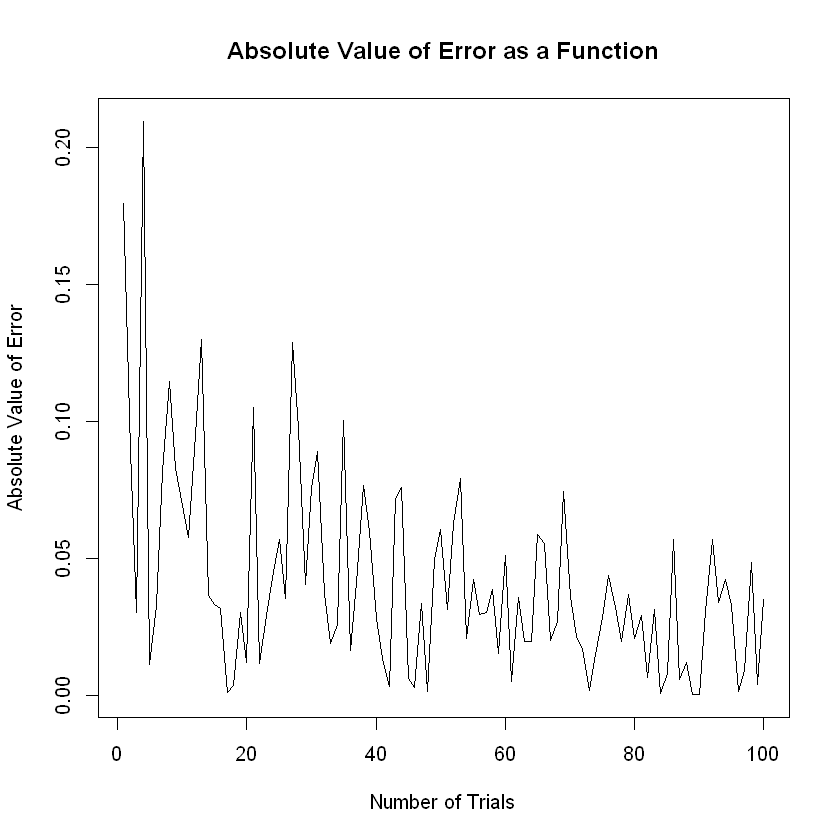

In [10]:
# Plot the error as a function of the number of trials
plot(error_vector,
     type="l",
     main="Absolute Value of Error as a Function", 
     xlab="Number of Trials", 
     ylab="Absolute Value of Error")

Observe how the absolute value of the error tends to decrease as the number of trials increases.